# sig DMGs and GOslim terms

I want to better understand what processes sig. DMGs are mostly involved in for each pairwise comparison and overall for hypoxic stress. I've been doing this in excel, but think it will be easier in R.

#### I. load and prep

In [14]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# load df
dmgs <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/sigDMG.goSlim.csv')
head(dmgs)

,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
2,LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
3,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
4,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
5,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
6,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development


#### II. Assigning treatment variables

In [5]:
cc <- dmgs %>% 
  filter(grepl("CC", pair_vs_HC))

ch <- dmgs %>% 
  filter(grepl("CH", pair_vs_HC))

hh <- dmgs %>% 
  filter(grepl("HH", pair_vs_HC))

In [7]:
head(hh)

,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
2,LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
3,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
4,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
5,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
6,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development


#### III. Counts of GOslim terms by treatment combination

In [9]:
cc.TermCounts <- cc %>% 
  count(Term) %>% # count freq of term
arrange(desc(n)) %>% # arrange most to least
mutate(label = 'CC vs. HC') %>% # add column for pairwise comparison
mutate(Percent = n / sum(n) * 100) %>%  # calc. percent
as.data.frame() # convert to data frame

cc.TermCounts

Term,n,label,Percent
<chr>,<int>,<chr>,<dbl>
NA,7,CC vs. HC,41.176471
anatomical structure development,3,CC vs. HC,17.647059
signaling,2,CC vs. HC,11.764706
DNA-templated transcription,1,CC vs. HC,5.882353
cell differentiation,1,CC vs. HC,5.882353
protein catabolic process,1,CC vs. HC,5.882353
regulation of DNA-templated transcription,1,CC vs. HC,5.882353
vesicle-mediated transport,1,CC vs. HC,5.882353


In [10]:
ch.TermCounts <- ch %>% 
  count(Term) %>% # count freq of term
arrange(desc(n)) %>% # arrange most to least
mutate(label = 'CH vs. HC') %>% # add column for pairwise comparison
mutate(Percent = n / sum(n) * 100) %>%  # calc. percent
as.data.frame() # convert to data frame

ch.TermCounts

Term,n,label,Percent
<chr>,<int>,<chr>,<dbl>
NA,115,CH vs. HC,43.7262357
signaling,17,CH vs. HC,6.4638783
DNA-templated transcription,10,CH vs. HC,3.8022814
anatomical structure development,8,CH vs. HC,3.0418251
protein catabolic process,8,CH vs. HC,3.0418251
intracellular protein transport,7,CH vs. HC,2.6615970
regulation of DNA-templated transcription,7,CH vs. HC,2.6615970
DNA repair,6,CH vs. HC,2.2813688
ribosome biogenesis,6,CH vs. HC,2.2813688


In [11]:
hh.TermCounts <- hh %>% 
  count(Term) %>% # count freq of term
arrange(desc(n)) %>% # arrange most to least
mutate(label = 'HH vs. HC') %>% # add column for pairwise comparison
mutate(Percent = n / sum(n) * 100) %>%  # calc. percent
as.data.frame() # convert to data frame

hh.TermCounts

Term,n,label,Percent
<chr>,<int>,<chr>,<dbl>
NA,40,HH vs. HC,37.7358491
anatomical structure development,7,HH vs. HC,6.6037736
signaling,7,HH vs. HC,6.6037736
DNA-templated transcription,4,HH vs. HC,3.7735849
carbohydrate derivative metabolic process,4,HH vs. HC,3.7735849
intracellular protein transport,4,HH vs. HC,3.7735849
mRNA metabolic process,4,HH vs. HC,3.7735849
regulation of DNA-templated transcription,4,HH vs. HC,3.7735849
lipid metabolic process,3,HH vs. HC,2.8301887


merge back into one df

In [12]:
merged.dmg <- rbind(cc.TermCounts, ch.TermCounts) %>%
rbind(hh.TermCounts)

dim(merged.dmg)
head(merged.dmg)

[1] 79  4

,Term,n,label,Percent
,<chr>,<int>,<chr>,<dbl>
1,NA,7,CC vs. HC,41.176471
2,anatomical structure development,3,CC vs. HC,17.647059
3,signaling,2,CC vs. HC,11.764706
4,DNA-templated transcription,1,CC vs. HC,5.882353
5,cell differentiation,1,CC vs. HC,5.882353
6,protein catabolic process,1,CC vs. HC,5.882353


#### IV. Visualize counts of terms

remove NAs to see better

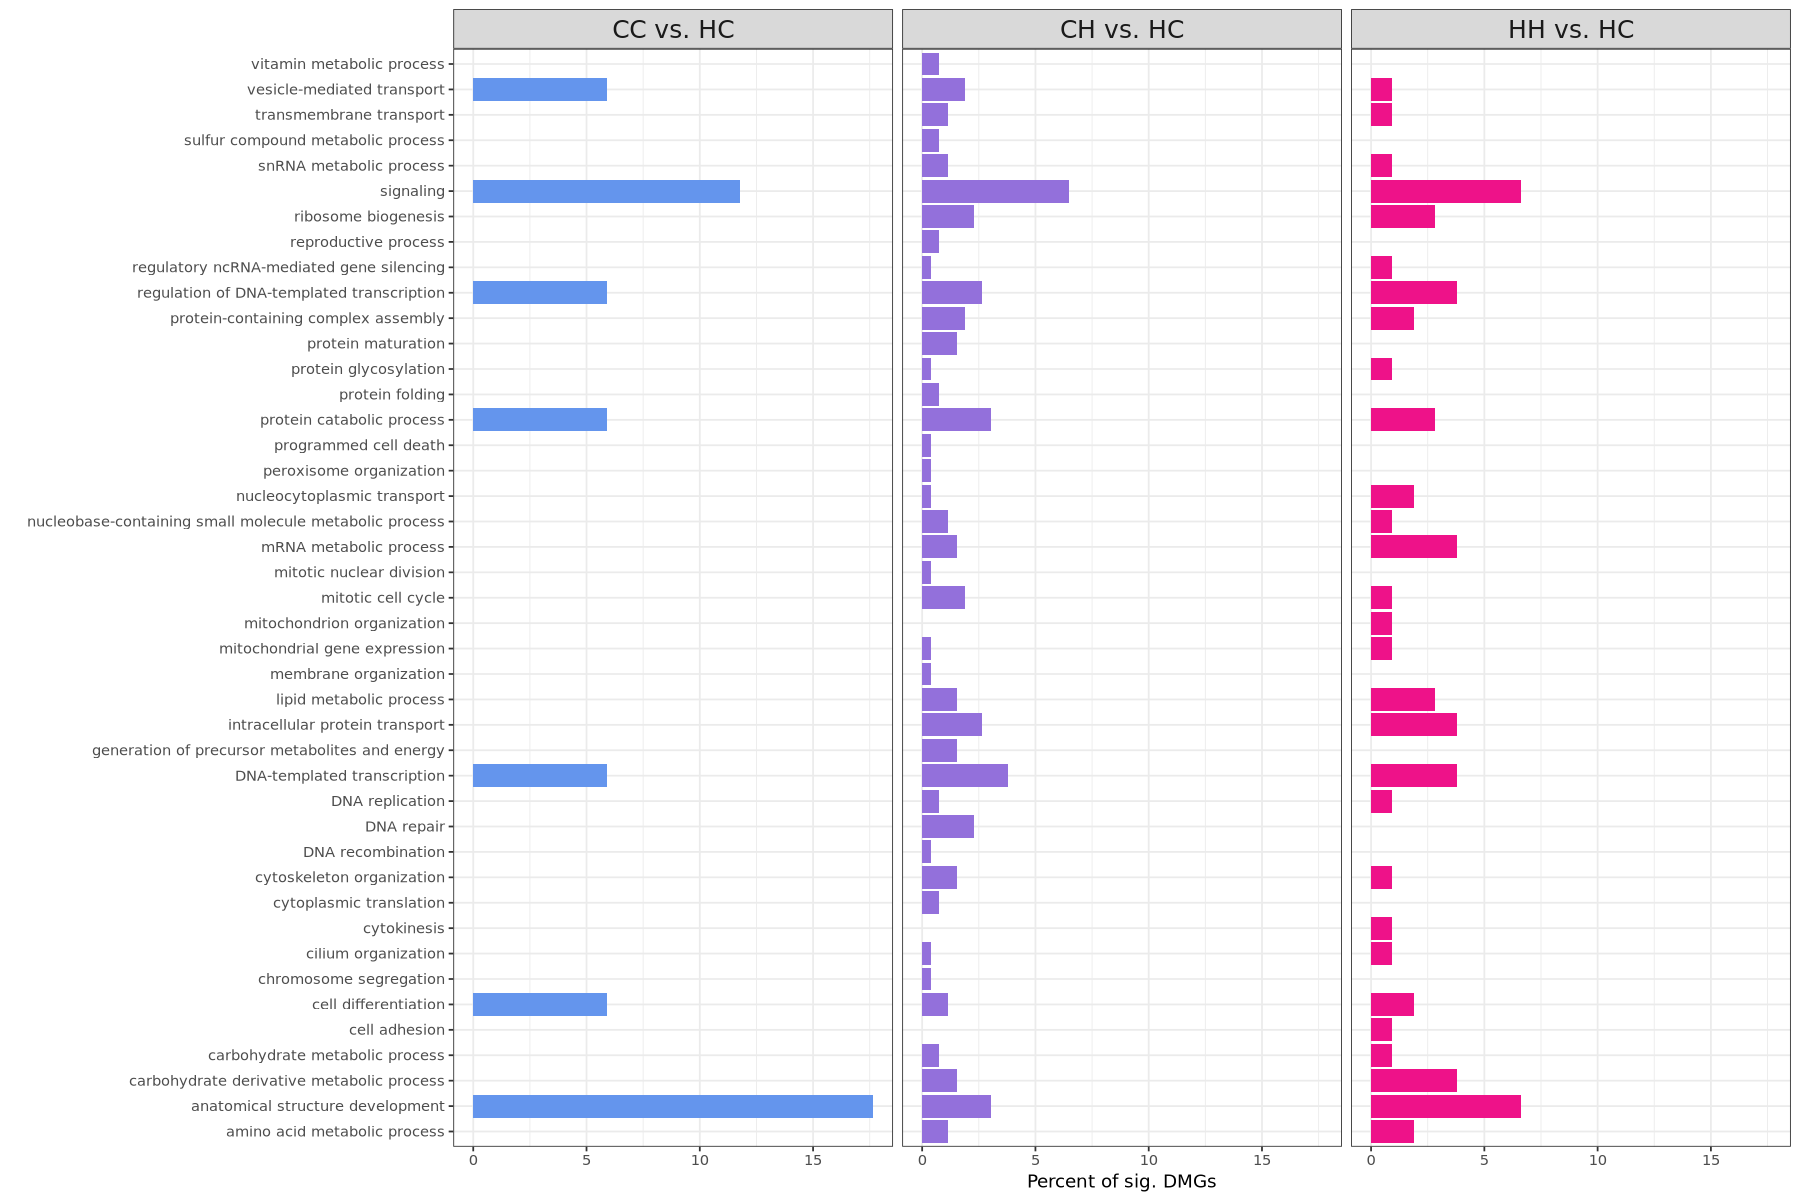

In [15]:
options(repr.plot.width=15, repr.plot.height=10)

ggplot(na.omit(merged.dmg), aes(x=Term, y = Percent, fill = label)) +
geom_col() +
facet_wrap(~label) +
coord_flip() +
guides(fill = 'none') +
scale_fill_manual(values = c('cornflowerblue',  'mediumpurple', 'deeppink2')) +
labs(y = 'Percent of sig. DMGs',
    x = '') +
theme_bw() +
theme(strip.text = element_text(size = 15)) 

this just looks too busy - would like to break it down into broader categories so there's less terms...

Also, above is any DMG that was identified as significant in that pair - it might be interesting to look at what isn't shared, what is uniquely differentially methylated in that comparison...

### unique DMG

starting with CH vs. HC

In [19]:
unique_cc <- dmgs %>%
filter(pair_vs_HC == 'CH') %>%
count(Term) %>%
arrange(desc(n)) %>%
mutate(percent = n/sum(n) * 100) %>%
as.data.frame()

head(unique_cc)

,Term,n,percent
,<chr>,<int>,<dbl>
1,NA,79,42.021277
2,signaling,12,6.382979
3,DNA-templated transcription,9,4.787234
4,protein catabolic process,7,3.723404
5,DNA repair,6,3.191489
6,regulation of DNA-templated transcription,6,3.191489


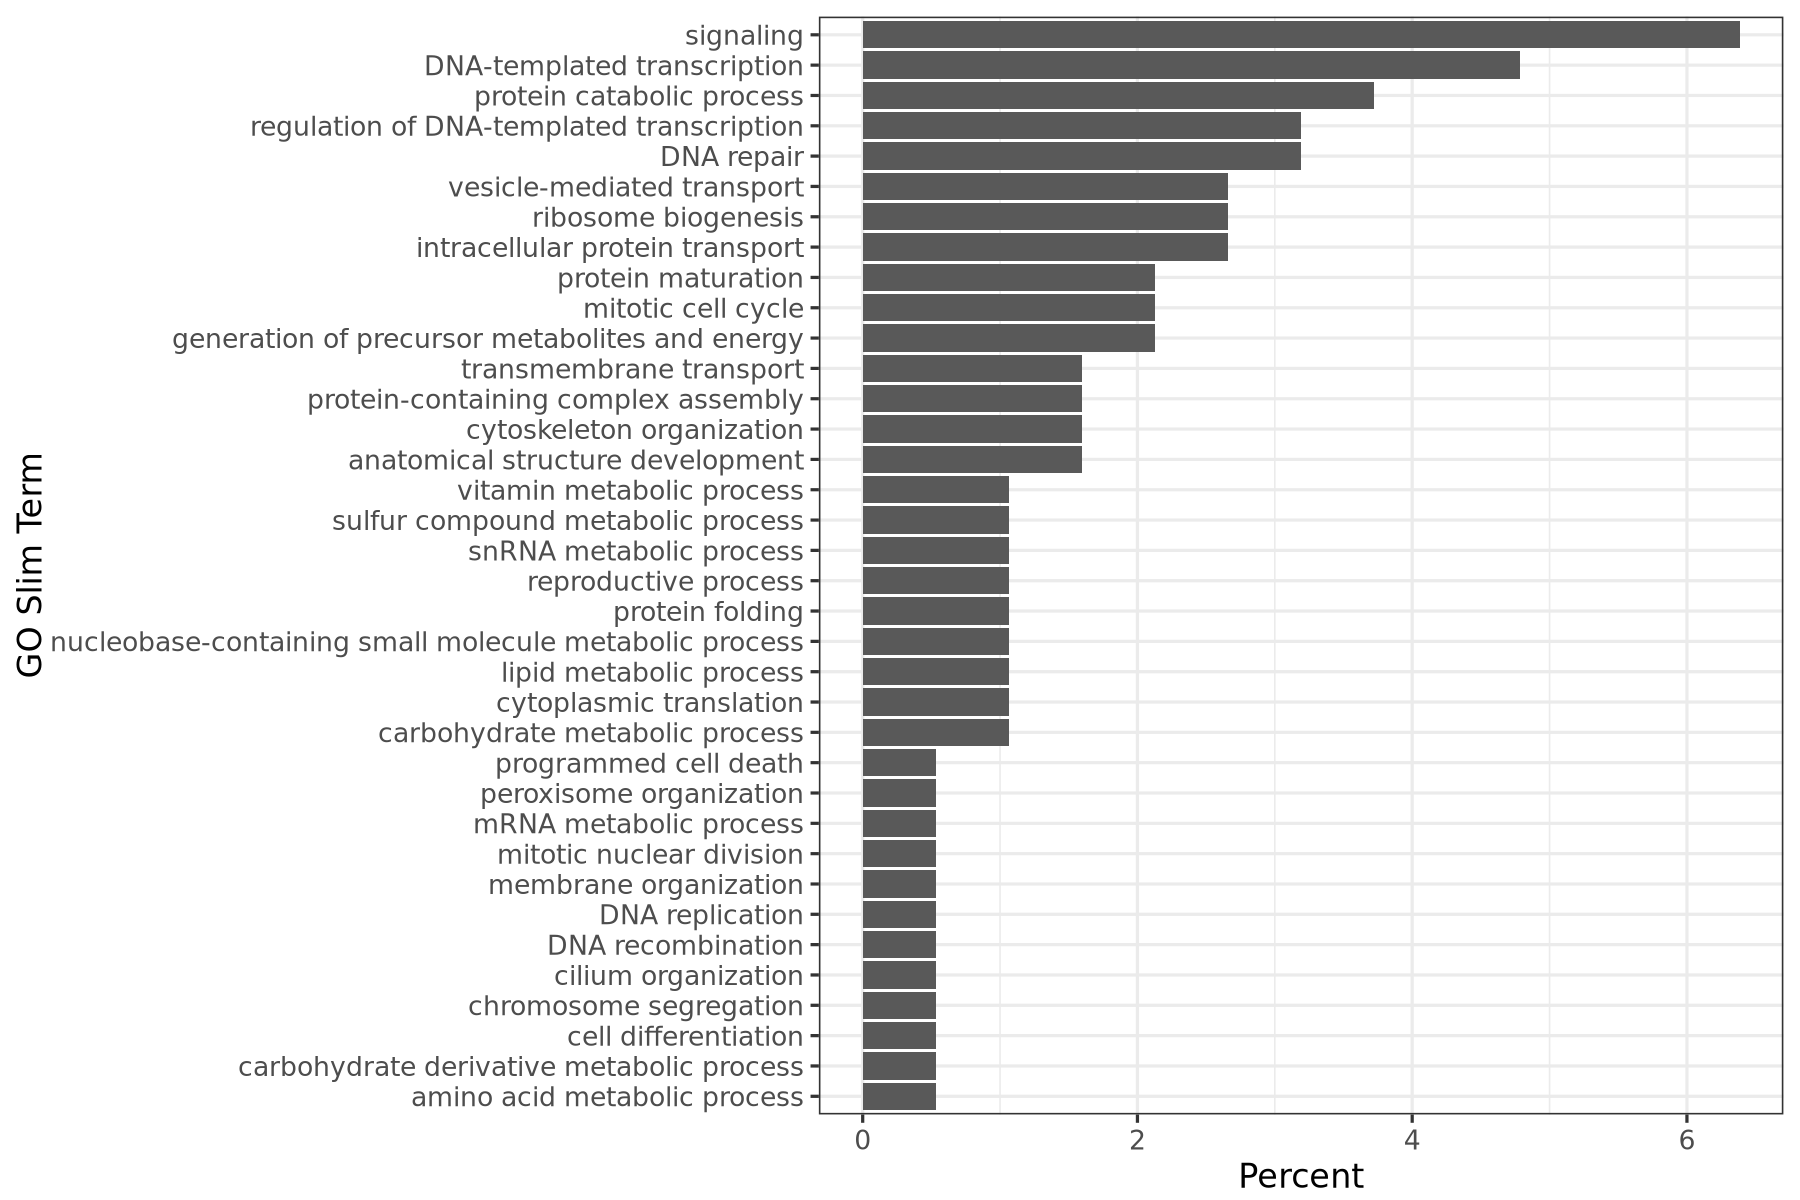

In [32]:
ggplot(na.omit(unique_cc),
       aes(x = fct_reorder(Term, percent, .desc = FALSE),
           y = percent)) + 
geom_col() + 
coord_flip() +
labs(x = 'GO Slim Term',
    y = 'Percent') +
theme_bw(base_size = 20)

In [43]:
head(dmgs)

,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
2,LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
3,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
4,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
5,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
6,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development


In [45]:
flat.dmgs <- dmgs %>% 
separate_rows(!!sym('GOslim'), sep = ";")

head(flat.dmgs)

gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154,cell differentiation
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0048856,cell differentiation


In [69]:
xx <- as.list(GOBPPARENTS)
xx <- xx[!is.na(xx)]
if (length(xx) > 0) {
  goids <- xx[[725]]
  term <- GOTERM[[goids[1]]]
  cat("GO ID:", GOID(term), "\n")
  cat("Term:", Term(term), "\n")
  cat("Definition:", Definition(term), "\n")
  cat("Ontology:", Ontology(term), "\n")
}

GO ID: GO:0043436 
Term: oxoacid metabolic process 
Definition: The chemical reactions and pathways involving any oxoacid; an oxoacid is a compound which contains oxygen, at least one other element, and at least one hydrogen bound to oxygen, and which produces a conjugate base by loss of positive hydrogen ion(s) (hydrons). 
Ontology: BP 


In [76]:
# Convert GOBPPARENTS to a list
go_parents <- as.list(GOBPPARENTS)

# Define your list of GO IDs
my_go_ids <- dmgs$GO.IDs

# Initialize an empty data frame to store the results
results <- data.frame(GO_ID = character(), Parent_GO_ID = character(), Term = character(), stringsAsFactors = FALSE)

# Loop through each of your GO IDs
for (go_id in my_go_ids) {
  # Find the parent GO IDs for the current GO ID
  parent_ids <- names(go_parents[go_parents == go_id])
  
  # Loop through each parent GO ID
  for (parent_id in parent_ids) {
    # Get the term for the parent GO ID
    term_data <- AnnotationDb::select(GOTERM, keys = parent_id, columns = c("TERM"))
    term <- term_data$TERM
    
    # Add the result to the data frame
    results <- rbind(results, data.frame(GO_ID = go_id, Parent_GO_ID = parent_id, Term = term))
  }
}

# Print the results
print(results)

ERROR: Error in loadNamespace(x): there is no package called ‘AnnotationDb’
